In [2]:
# Install libraries
!pip install pybaseball
!pip install -U scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [3]:
from pybaseball import batting_stats
import pandas as pd

# Define the seasons you want
years = [2022, 2023, 2024]

# Download and combine data for all years
dfs = []
for year in years:
    df_year = batting_stats(year, qual=100)
    df_year["season"] = year
    dfs.append(df_year)

# Combine into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Preview and save
print(df_all.shape)
print(df_all.head())

(1385, 321)
    IDfg  Season              Name Team  Age    G   AB   PA    H   1B  ...  \
0  15640    2022       Aaron Judge  NYY   30  157  570  696  177   87  ...   
1   9777    2022     Nolan Arenado  STL   31  148  557  620  163   90  ...   
2  11493    2022     Manny Machado  SDP   29  150  578  644  172  102  ...   
3   5417    2022       Jose Altuve  HOU   32  141  527  604  158   91  ...   
4   9218    2022  Paul Goldschmidt  STL   34  151  561  651  178  102  ...   

   HardHit  HardHit%  Events  CStr%   CSW%    xBA   xSLG  xwOBA  L-WAR  season  
0      247     0.611     404  0.169  0.287  0.305  0.706  0.463   11.4    2022  
1      190     0.389     489  0.155  0.241  0.266  0.445  0.339    7.1    2022  
2      219     0.490     447  0.126  0.243  0.264  0.447  0.338    7.4    2022  
3      131     0.297     441  0.173  0.240  0.269  0.440  0.354    6.6    2022  
4      201     0.472     426  0.196  0.295  0.261  0.482  0.367    7.0    2022  

[5 rows x 321 columns]


Kept 25 columns. Missing: none
(1385, 25)
      id              name team  season   pa    avg  babip  bb_rate  k_rate  \
0  15640       Aaron Judge  NYY    2022  696  0.311  0.340    0.159   0.251   
1   9777     Nolan Arenado  STL    2022  620  0.293  0.290    0.084   0.116   
2  11493     Manny Machado  SDP    2022  644  0.298  0.337    0.098   0.207   
3   5417       Jose Altuve  HOU    2022  604  0.300  0.315    0.109   0.144   
4   9218  Paul Goldschmidt  STL    2022  651  0.317  0.368    0.121   0.217   

   sprint_speed  ...  zcontact  contact     ld     gb     fb   iffb  hr_fb  \
0           4.0  ...     0.852    0.722  0.193  0.373  0.435  0.046  0.356   
1           2.6  ...     0.908    0.823  0.204  0.297  0.499  0.168  0.123   
2           4.3  ...     0.856    0.768  0.206  0.378  0.416  0.151  0.172   
3           5.0  ...     0.910    0.846  0.204  0.410  0.387  0.120  0.168   
4           3.6  ...     0.818    0.763  0.189  0.403  0.408  0.104  0.202   

    pull   opp

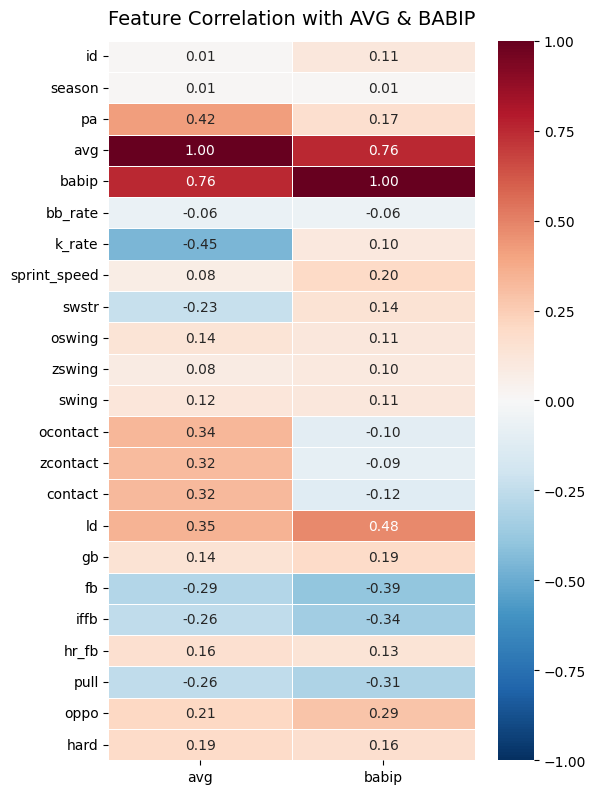


Top 10 correlated features with AVG:
avg         1.000000
babip       0.756286
pa          0.415410
ld          0.349132
ocontact    0.335655
contact     0.322088
zcontact    0.315147
oppo        0.210543
hard        0.188776
hr_fb       0.162291
Name: avg, dtype: float64

Top 10 correlated features with BABIP:
babip           1.000000
avg             0.756286
ld              0.477229
oppo            0.288332
sprint_speed    0.196965
gb              0.187817
pa              0.165157
hard            0.164998
swstr           0.143972
hr_fb           0.132995
Name: babip, dtype: float64


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# columns we want to consider
cols = [
    'IDfg','Name','Team','Season','PA','AVG','BABIP','BB%','K%','Spd',
    'SwStr%','O-Swing%','Z-Swing%','Swing%','O-Contact%','Z-Contact%','Contact%',
    'LD%','GB%','FB%','IFFB%','HR/FB','Pull%','Oppo%','Hard%'
]

# keep only the intersection
available = [c for c in cols if c in df_all.columns]
missing = [c for c in cols if c not in df_all.columns]

df_focus = df_all[available].copy()
print(f"Kept {len(available)} columns. Missing: {missing if missing else 'none'}")

# standardize column names to snake_case
rename_map = {
    'IDfg': 'id', 'Name': 'name', 'Team': 'team', 'Season': 'season', 'PA': 'pa',
    'AVG': 'avg', 'BABIP': 'babip', 'BB%': 'bb_rate', 'K%': 'k_rate', 'Spd': 'sprint_speed',
    'SwStr%': 'swstr', 'O-Swing%': 'oswing', 'Z-Swing%': 'zswing', 'Swing%': 'swing',
    'O-Contact%': 'ocontact', 'Z-Contact%': 'zcontact', 'Contact%': 'contact',
    'LD%': 'ld', 'GB%': 'gb', 'FB%': 'fb', 'IFFB%': 'iffb', 'HR/FB': 'hr_fb',
    'Pull%': 'pull', 'Oppo%': 'oppo', 'Hard%': 'hard'
}
df_focus.rename(columns=rename_map, inplace=True)

# Preview and save
print(df_focus.shape)
print(df_focus.head())

# filter to meaningful seasons
MIN_PA = 200
df_corr = df_focus[df_focus['pa'] >= MIN_PA].copy()

# select numeric columns (ignore id/name/team)
num_cols = df_corr.select_dtypes(include=[np.number]).columns.tolist()

# compute correlation matrix
corr = df_corr[num_cols].corr()

# extract only features vs AVG and BABIP
targets = ['avg', 'babip']
corr_targets = corr[targets].copy()

# plot
plt.figure(figsize=(6, max(4, 0.35 * len(corr_targets))))
sns.heatmap(corr_targets, cmap='RdBu_r', center=0, vmin=-1, vmax=1,
            linewidths=0.5, annot=True, fmt=".2f")
plt.title("Feature Correlation with AVG & BABIP", fontsize=14, pad=12)
plt.tight_layout()
plt.show()

# optional: quick sorted correlations to inspect top signals
print("\nTop 10 correlated features with AVG:")
print(corr_targets['avg'].sort_values(ascending=False).head(10))
print("\nTop 10 correlated features with BABIP:")
print(corr_targets['babip'].sort_values(ascending=False).head(10))

In [5]:
# =============================================================================
# ORION: DATA CLEANING AND PROCESSING (STEP 2)
# =============================================================================

import pandas as pd
import numpy as np

print("STEP 2: CLEAN AND PROCESS DATA")
print("=" * 40)

# Start with the focused dataset
df_clean = df_focus.copy()
print(f"Starting: {df_clean.shape}")

# 1. EXPLORATORY DATA ANALYSIS
print("\n1. Data Info:")
print(f"Shape: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")
print(f"Data types: {df_clean.dtypes.value_counts().to_dict()}")

# 2. REMOVE COLUMNS WITH LOTS OF MISSING DATA (>50%)
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
cols_to_drop = missing_pct[missing_pct > 50].index.tolist()
if cols_to_drop:
    df_clean = df_clean.drop(columns=cols_to_drop)
    print(f"\n2. Removed {len(cols_to_drop)} columns with >50% missing data")

# 3. REMOVE DUPLICATE PLAYERS (keep highest PA)
duplicates_before = df_clean.duplicated(subset=['name', 'season']).sum()
df_clean = df_clean.sort_values('pa', ascending=False).drop_duplicates(subset=['name', 'season'], keep='first')
print(f"\n3. Removed {duplicates_before} duplicate player-season combinations")

# 4. HANDLE TEXT DATA
# Convert team to dummy variables
if 'team' in df_clean.columns:
    team_dummies = pd.get_dummies(df_clean['team'], prefix='team')
    df_clean = pd.concat([df_clean, team_dummies], axis=1).drop(columns=['team'])

# Convert name to numeric ID (simple approach without sklearn)
if 'name' in df_clean.columns:
    unique_names = df_clean['name'].unique()
    name_to_id = {name: idx for idx, name in enumerate(unique_names)}
    df_clean['player_id'] = df_clean['name'].map(name_to_id)
    df_clean = df_clean.drop(columns=['name'])

print(f"\n4. Handled text data: {df_clean.shape}")

# 5. CONVERT DATA TYPES
for col in df_clean.columns:
    if col in ['id', 'season', 'player_id']:
        df_clean[col] = df_clean[col].astype('int32')
    else:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 6. REMOVE OUTLIERS (conservative 3*IQR rule)
key_cols = ['avg', 'babip', 'pa', 'bb_rate', 'k_rate', 'sprint_speed']
initial_rows = len(df_clean)

for col in key_cols:
    if col in df_clean.columns:
        Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        bounds = (Q1 - 3*IQR, Q3 + 3*IQR)
        df_clean = df_clean[(df_clean[col] >= bounds[0]) & (df_clean[col] <= bounds[1])]

print(f"\n5-6. Removed {initial_rows - len(df_clean)} outliers, converted data types")

# 7. FINAL CLEANUP
# Fill remaining missing values
df_clean = df_clean.fillna(df_clean.median(numeric_only=True))

print(f"\n7. Final dataset: {df_clean.shape}")
print(f"Missing values: {df_clean.isnull().sum().sum()}")

# Save cleaned data
df_clean.to_csv("cleaned_batting_data.csv", index=False)
print(f"\nCleaned data saved to: cleaned_batting_data.csv")
print("DATA CLEANING COMPLETE!")


STEP 2: CLEAN AND PROCESS DATA
Starting: (1385, 25)

1. Data Info:
Shape: (1385, 25)
Missing values: 0
Data types: {dtype('float64'): 20, dtype('int64'): 3, dtype('O'): 2}

3. Removed 0 duplicate player-season combinations

4. Handled text data: (1385, 55)

5-6. Removed 0 outliers, converted data types

7. Final dataset: (1385, 55)
Missing values: 0

Cleaned data saved to: cleaned_batting_data.csv
DATA CLEANING COMPLETE!


In [6]:
# Bell Train/Test Splitting
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
import pandas as pd
from sklearn.model_selection import train_test_split

# Load proccessed data
df = pd.read_csv('cleaned_batting_data.csv')

# Set X and Y
X = df.drop(columns=['avg'])
Y = df["avg"]

# Split traning and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Save datasets as csv
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
Y_train.to_csv('Y_train.csv', index=False)
Y_test.to_csv('Y_test.csv', index=False)

STEP 3: LINEAR REGRESSION (AVG)
Train: X=(1108, 54)  Y=(1108,)
Test:  X=(277, 54)   Y=(277,)

Performance:
Train -> MAE: 0.0031 | RMSE: 0.0044 | R2: 0.9844
Test  -> MAE: 0.0034 | RMSE: 0.0049 | R2: 0.9791

Top 15 absolute coefficients:
    feature  coefficient
0     babip     0.681247
1    k_rate    -0.349928
2        fb     0.202302
3     hr_fb     0.185578
4        gb     0.144864
5        ld     0.138990
6   bb_rate    -0.079354
7     swstr     0.066664
8   contact     0.043267
9     swing    -0.017666
10     hard     0.014919
11   oswing     0.010883
12     oppo     0.010615
13     iffb    -0.007009
14     pull     0.003807


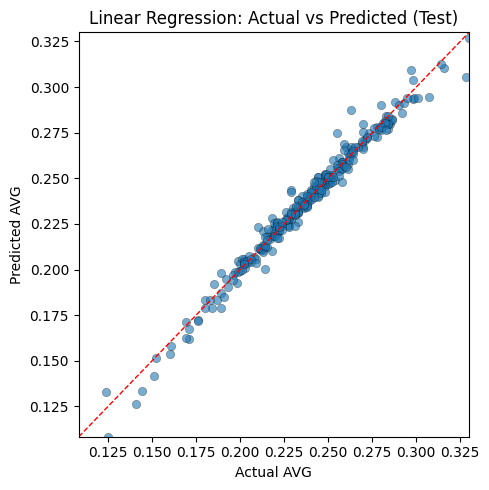


Saved model -> linear_regression_avg.pkl
Saved coefficients -> linear_regression_coefficients.csv


In [7]:
# Linear Regression Model Training
# - Trains a baseline LinearRegression to predict AVG
# - Evaluates with MAE, RMSE, R2
# - Shows top coefficients and saves the model/coeffs

import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt

# -----------------------------
# Load data
# -----------------------------
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")
Y_train = pd.read_csv("Y_train.csv").squeeze("columns")
Y_test  = pd.read_csv("Y_test.csv").squeeze("columns")

# Defensive: ensure target is numeric
Y_train = pd.to_numeric(Y_train, errors="coerce")
Y_test  = pd.to_numeric(Y_test, errors="coerce")

# Drop any rows with missing targets (should be none)
mask_tr = ~Y_train.isna()
mask_te = ~Y_test.isna()
X_train_lr = X_train.loc[mask_tr].copy()
Y_train_lr = Y_train.loc[mask_tr].copy()
X_test_lr  = X_test.loc[mask_te].copy()
Y_test_lr  = Y_test.loc[mask_te].copy()

print("STEP 3: LINEAR REGRESSION (AVG)")
print("=" * 40)
print(f"Train: X={X_train_lr.shape}  Y={Y_train_lr.shape}")
print(f"Test:  X={X_test_lr.shape}   Y={Y_test_lr.shape}")

# -----------------------------
# Fit model
# -----------------------------
lin = LinearRegression()
lin.fit(X_train_lr, Y_train_lr)

# -----------------------------
# Evaluate
# -----------------------------
train_pred = lin.predict(X_train_lr)
test_pred  = lin.predict(X_test_lr)

mae_tr = mean_absolute_error(Y_train_lr, train_pred)
mse_tr = mean_squared_error(Y_train_lr, train_pred)
rmse_tr = np.sqrt(mse_tr)
r2_tr = r2_score(Y_train_lr, train_pred)

mae_te = mean_absolute_error(Y_test_lr, test_pred)
mse_te = mean_squared_error(Y_test_lr, test_pred)
rmse_te = np.sqrt(mse_te)
r2_te = r2_score(Y_test_lr, test_pred)

print("\nPerformance:")
print(f"Train -> MAE: {mae_tr:.4f} | RMSE: {rmse_tr:.4f} | R2: {r2_tr:.4f}")
print(f"Test  -> MAE: {mae_te:.4f} | RMSE: {rmse_te:.4f} | R2: {r2_te:.4f}")

# -----------------------------
# Coefficients
# -----------------------------
coefs = pd.Series(lin.coef_, index=X_train_lr.columns).sort_values(key=np.abs, ascending=False)
coef_df = pd.DataFrame({"feature": coefs.index, "coefficient": coefs.values})
print("\nTop 15 absolute coefficients:")
print(coef_df.head(15))

# Save coefficients for later inspection
coef_df.to_csv("linear_regression_coefficients.csv", index=False)

# -----------------------------
# Quick scatter: actual vs predicted (test)
# -----------------------------
plt.figure(figsize=(5,5))
plt.scatter(Y_test_lr, test_pred, alpha=0.6, edgecolor="k", linewidth=0.3)
lims = [min(Y_test_lr.min(), test_pred.min()), max(Y_test_lr.max(), test_pred.max())]
plt.plot(lims, lims, "r--", lw=1)
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual AVG")
plt.ylabel("Predicted AVG")
plt.title("Linear Regression: Actual vs Predicted (Test)")
plt.tight_layout()
plt.show()

# -----------------------------
# Persist model
# -----------------------------
joblib.dump(lin, "linear_regression_avg.pkl")
print("\nSaved model -> linear_regression_avg.pkl")
print("Saved coefficients -> linear_regression_coefficients.csv")

# TODO: not include babip as a coefficient (perhaps as a seperate regression model)


0.029629306837352057


['rf_baa_model.pkl']

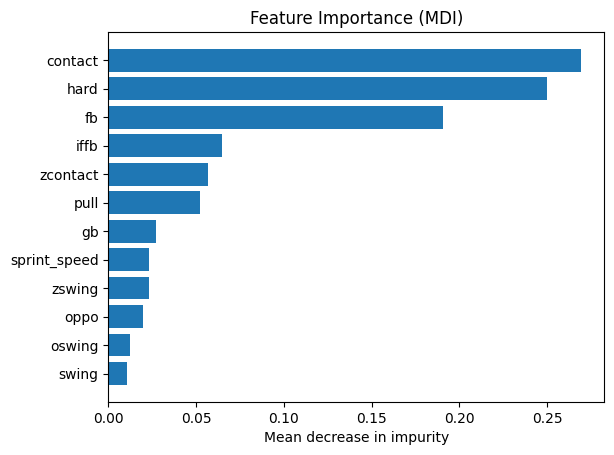

In [14]:
# Random Forest Model Training
# Source: https://kirenz.github.io/regression/docs/randomforest.html
from collections import OrderedDict


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import joblib

X_rf_train = pd.read_csv("X_train.csv")
X_rf_test = pd.read_csv("X_test.csv")
Y_rf_train = pd.read_csv("Y_train.csv")
Y_rf_test = pd.read_csv("Y_test.csv")

selected_features = [ "gb","fb","iffb","hard","pull","oppo","sprint_speed", "contact", "zcontact", "swing", "zswing", "oswing"]

X_rf_train = X_rf_train[selected_features]
X_rf_test = X_rf_test[selected_features]

# make flatten array
Y_rf_train = np.ravel(Y_rf_train)
Y_rf_test = np.ravel(Y_rf_test)


# define hyperparamerters
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

# build model
reg =RandomForestRegressor(**params)

reg.fit(X_rf_train, Y_rf_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

#make prediction
Y_pred = reg.predict(X_rf_test)

# evaluate model with MSE
rmse = np.sqrt(mean_squared_error(Y_rf_test, Y_pred,))
print(rmse)


# obtain feature importance
feature_importance = reg.feature_importances_

# sort features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# plot feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(selected_features)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

# save model
joblib.dump(reg, "rf_baa_model.pkl")



In [ ]:
# Mixed effects Model Training
from sklearn.preprocessing import StandardScaler

# --- BABIP feature selection ---
# Load your already-split features
X_train = pd.read_csv("X_train.csv")
X_test  = pd.read_csv("X_test.csv")

# Fixed effects for BABIP
babip_fixed = ["ld","gb","fb","iffb","hard","pull","oppo","sprint_speed"]

# Columns we must carry for mixed-effects + weights
carry_cols = ["id","season","pa"]

# Ensure we have everything; if any carry_cols are missing from X_*, try to merge from the cleaned file
needed = babip_fixed + carry_cols
missing_tr = [c for c in needed if c not in X_train.columns]
missing_te = [c for c in needed if c not in X_test.columns]

if missing_tr or missing_te:
    base = pd.read_csv("cleaned_batting_data.csv")
    join_keys = [k for k in ["id","season"] if k in X_train.columns and k in base.columns]
    if not join_keys:
        raise KeyError("Need join keys ('id','season') in X_train and cleaned_batting_data.csv to fetch missing columns.")
    fetch_cols = list(set(needed + join_keys))
    X_train = X_train.merge(base[fetch_cols].drop_duplicates(join_keys), on=join_keys, how="left")
    X_test  = X_test.merge(base[fetch_cols].drop_duplicates(join_keys),  on=join_keys, how="left")

# Final BABIP matrices (features + carry-alongs)
X_babip_train = X_train[needed].copy()
X_babip_test  = X_test[needed].copy()

print("BABIP features ready.")
print("Train shape:", X_babip_train.shape, "| Test shape:", X_babip_test.shape)

base = pd.read_csv("cleaned_batting_data.csv")

# Join the babip target by (id, season)
join_keys = [k for k in ["id","season"] if k in X_babip_train.columns and k in base.columns]
if not join_keys:
    raise KeyError("Need 'id' and/or 'season' in both X_babip_* and cleaned_batting_data.csv")

train_babip = X_babip_train.merge(
    base[join_keys + ["babip"]].drop_duplicates(join_keys),
    on=join_keys, how="left"
)
test_babip = X_babip_test.merge(
    base[join_keys + ["babip"]].drop_duplicates(join_keys),
    on=join_keys, how="left"
)

# Drop rows without target (just in case)
train_babip = train_babip.dropna(subset=["babip"]).copy()

# Standardize the fixed effects (keeps id/season/pa untouched)
scaler = StandardScaler().fit(train_babip[babip_fixed])

train_babip_s = train_babip.copy()
test_babip_s  = test_babip.copy()
train_babip_s[babip_fixed] = scaler.transform(train_babip[babip_fixed])
test_babip_s[babip_fixed]  = scaler.transform(test_babip[babip_fixed])

print("Prepared frames:")
print("train_babip_s:", train_babip_s.shape, " test_babip_s:", test_babip_s.shape)
train_babip_s.head(3)


BABIP features ready.
Train shape: (1108, 11) | Test shape: (277, 11)
Prepared frames:
train_babip_s: (1108, 12)  test_babip_s: (277, 12)


,ld,gb,fb,iffb,hard,pull,oppo,sprint_speed,id,season,pa,babip
0,-0.063022,-0.925755,0.945463,-0.157470,0.703520,-0.646152,0.219987,-1.266499,10472,2024,393,0.257
1,0.774678,-0.147558,-0.215685,0.283234,-0.057001,0.956256,-1.232639,-1.105904,22217,2023,174,0.331
2,2.031227,0.013954,-0.999460,-1.017893,-0.682318,1.118115,-1.663887,1.035366,27462,2024,257,0.314
